In [1]:
import geopandas as gpd
import osmnx as ox

%matplotlib inline
ox.__version__

'1.3.0'

In [2]:
ox.settings.use_cache = False

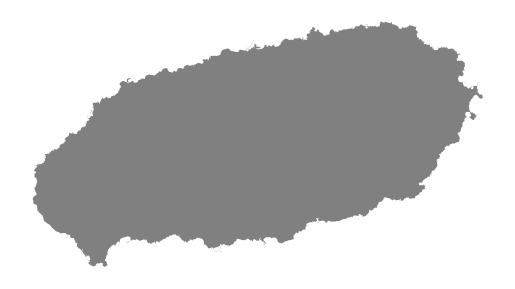

In [5]:
city = ox.geocode_to_gdf("Jeju Island, South Korea")
city_proj = ox.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")

In [7]:
# create the street network within the city of Piedmont's borders
G = ox.graph_from_place("Jeju Island, South Korea", network_type="drive")

In [8]:
# save street network as GeoPackage to work with in GIS
ox.save_graph_geopackage(G, filepath="./data/network.gpkg")

In [9]:
stats = ox.basic_stats(G)
stats["circuity_avg"]

1.0668538435243478

In [12]:
import osmnx as ox
import time
from shapely.geometry import Polygon
import os
import numpy as np

def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)
    # We need an unique ID for each edge
    gdf_edges["fid"] = np.arange(0, gdf_edges.shape[0], dtype='int')
    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding=encoding)
    gdf_edges.to_file(filepath_edges, encoding=encoding)

print("osmnx version",ox.__version__)

# Download by a bounding box
# bounds = (17.4110711999999985,18.4494298999999984,59.1412578999999994,59.8280297000000019)
# x1,x2,y1,y2 = bounds
# boundary_polygon = Polygon([(x1,y1),(x2,y1),(x2,y2),(x1,y2)])
G = ox.graph_from_place("JeJu Island, South Korea", network_type='drive')
start_time = time.time()
save_graph_shapefile_directional(G, filepath='./network-new')
print("--- %s seconds ---" % (time.time() - start_time))



osmnx version 1.3.0


/var/folders/fb/nndy9zds6ql03dg2wmvtk8zw0000gn/T/ipykernel_76721/26307612.py:26: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, encoding=encoding)


--- 5.9704859256744385 seconds ---


ValueError: Nominatim geocoder only returned 1 result(s) for query "JeJu Island, South Korea"

In [15]:
# Download by place name
place ="JeJu Island, South Korea"
G = ox.graph_from_place(place, network_type='drive', which_result=1)
save_graph_shapefile_directional(G, filepath='Jeju Island')


/var/folders/fb/nndy9zds6ql03dg2wmvtk8zw0000gn/T/ipykernel_76721/26307612.py:26: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, encoding=encoding)


In [14]:

# Download by a boundary polygon in geojson
import osmnx as ox
from shapely.geometry import shape
json_file = open("Jeju Island.geojson")
import json
data = json.load(json_file)
boundary_polygon = shape(data["features"][0]['geometry'])
G = ox.graph_from_polygon(boundary_polygon, network_type='drive')
save_graph_shapefile_directional(G, filepath='Jeju Island')

/var/folders/fb/nndy9zds6ql03dg2wmvtk8zw0000gn/T/ipykernel_76721/26307612.py:26: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, encoding=encoding)
